In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [56]:
column_names = ["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)", "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)", "Class variable (0 or 1)"]
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', names=column_names)
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


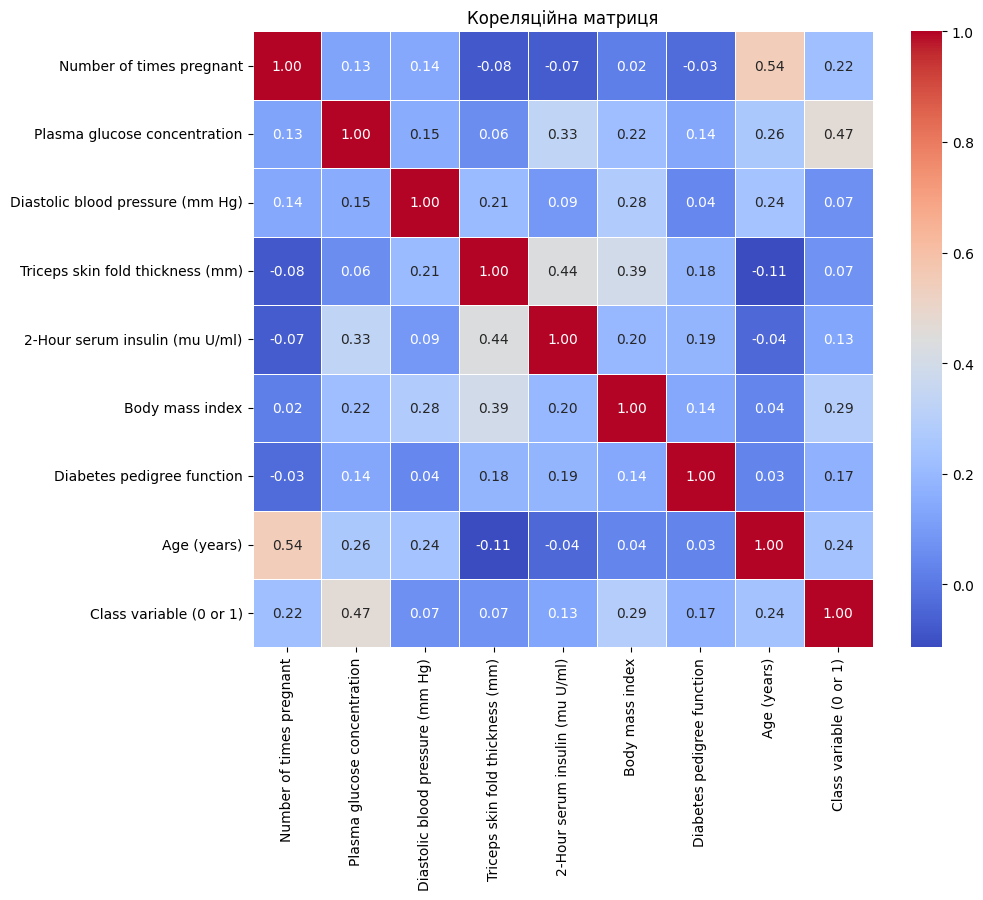

In [57]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [58]:
X_train, X_val, y_train, y_val = train_test_split(df[['Number of times pregnant', 'Plasma glucose concentration', 'Body mass index', 'Age (years)']], 
                                                  df['Class variable (0 or 1)'], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_val)

In [59]:
model = LogisticRegression()
model.fit(X_train_normalized, y_train)


y_pred = model.predict(X_test_normalized)


accuracy = accuracy_score(y_val, y_pred)
print("accuracy:", accuracy)

accuracy: 0.7402597402597403


In [60]:
walk_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/walk/Accelerometer.csv')
walk_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/walk/Gyroscope.csv')

run_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/run/Accelerometer.csv')
run_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/run/Gyroscope.csv')

squatting_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/squatting/Accelerometer.csv')
squatting_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/squatting/Gyroscope.csv')

In [61]:
walk_accelerometer_data.columns = [f'accel_{col}' for col in walk_accelerometer_data.columns]
walk_gyroscope_data.columns = [f'gyro_{col}' for col in walk_gyroscope_data.columns]

run_accelerometer_data.columns = [f'accel_{col}' for col in run_accelerometer_data.columns]
run_gyroscope_data.columns = [f'gyro_{col}' for col in run_gyroscope_data.columns]

squatting_accelerometer_data.columns = [f'accel_{col}' for col in squatting_accelerometer_data.columns]
squatting_gyroscope_data.columns = [f'gyro_{col}' for col in squatting_gyroscope_data.columns]

# Об'єднання даних в один датасет
walk_data = pd.concat([walk_accelerometer_data, walk_gyroscope_data], axis=1)
run_data = pd.concat([run_accelerometer_data, run_gyroscope_data], axis=1)
squatting_data = pd.concat([squatting_accelerometer_data, squatting_gyroscope_data], axis=1)

# Додавання стовпця з міткою для класу активності
walk_data['activity'] = '0'
run_data['activity'] = '1'
squatting_data['activity'] = '2'

# Об'єднання всіх даних в один датасет
all_data = pd.concat([walk_data, run_data, squatting_data], ignore_index=True)


all_data.head()

,accel_time,accel_seconds_elapsed,accel_z,accel_y,accel_x,gyro_time,gyro_seconds_elapsed,gyro_z,gyro_y,gyro_x,activity
0,1.717011e+18,0.093537,1.762593,0.581862,-0.348343,1717011034562616300,0.053616,0.017104,0.141110,-0.009774,0
1,1.717011e+18,0.133516,-0.751598,-0.991150,1.519213,1717011034602626800,0.093627,0.017104,0.141110,-0.009774,0
2,1.717011e+18,0.193513,-3.007939,-0.943558,0.454231,1717011034642610400,0.133610,-1.241278,-1.804496,1.861306,0
3,1.717011e+18,0.253510,1.740246,1.974828,-4.152980,1717011034682617900,0.173618,-2.345112,-2.946814,0.869261,0
4,1.717011e+18,0.313539,0.361974,-0.969770,2.135663,1717011034722627000,0.213627,-2.958420,-0.590707,-0.168599,0


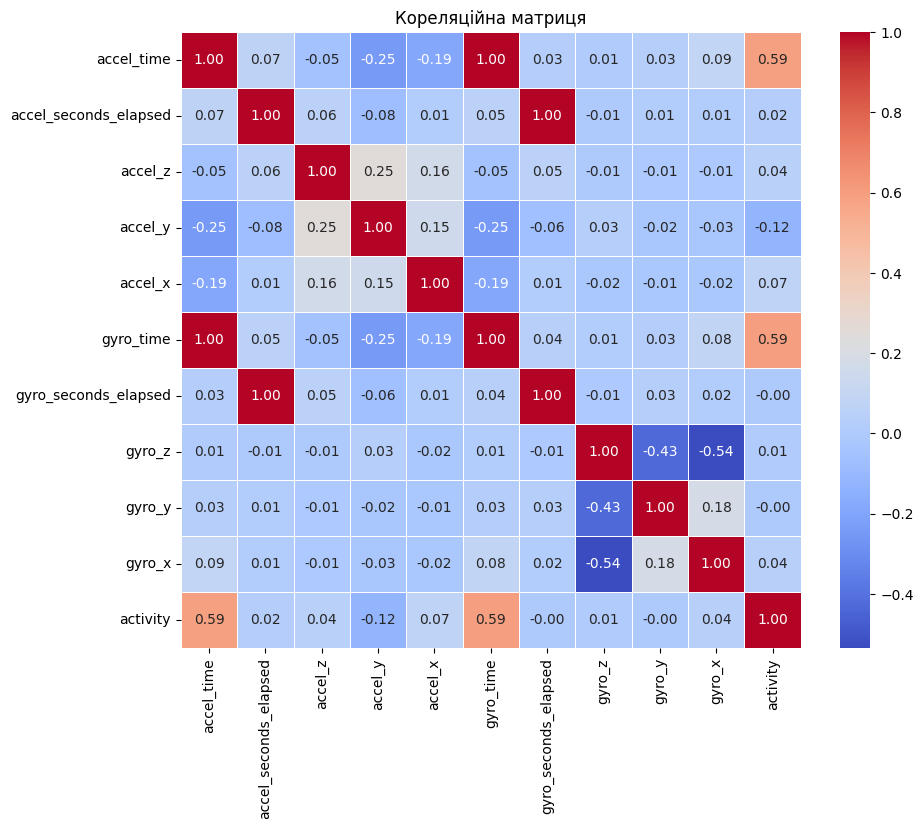

In [62]:
corr = all_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [63]:
def calculate_std_within_window(window):
    return np.std(window)

# Функція для обчислення середнього арифметичного значення колонки activity в межах вікна
def calculate_mean_activity_within_window(window):
    return round(np.mean(window))

# Розділення датасету на вікна по 30 рядків
window_size = 30
num_windows = len(all_data) // window_size
windows = [all_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

# Створення списків для зберігання даних
accel_z_std_list = []
accel_y_std_list = []
accel_x_std_list = []
gyro_z_std_list = []
gyro_y_std_list = []
gyro_x_std_list = []
activity_list = []

# Обчислення середнього квадратичного відхилення та середнього арифметичного для кожного вікна
for window in windows:
    accel_z_std = calculate_std_within_window(window['accel_z'])
    accel_y_std = calculate_std_within_window(window['accel_y'])
    accel_x_std = calculate_std_within_window(window['accel_x'])
    gyro_z_std = calculate_std_within_window(window['gyro_z'])
    gyro_y_std = calculate_std_within_window(window['gyro_y'])
    gyro_x_std = calculate_std_within_window(window['gyro_x'])
    
    window['activity'] = pd.to_numeric(window['activity'])
    activity = calculate_mean_activity_within_window(window['activity'])
    
    accel_z_std_list.append(accel_z_std)
    accel_y_std_list.append(accel_y_std)
    accel_x_std_list.append(accel_x_std)
    gyro_z_std_list.append(gyro_z_std)
    gyro_y_std_list.append(gyro_y_std)
    gyro_x_std_list.append(gyro_x_std)
    activity_list.append(activity)

# Створення нового датасету з обчисленими значеннями
new_data = pd.DataFrame({
    'accel_z_std': accel_z_std_list,
    'accel_y_std': accel_y_std_list,
    'accel_x_std': accel_x_std_list,
    'gyro_z_std': gyro_z_std_list,
    'gyro_y_std': gyro_y_std_list,
    'gyro_x_std': gyro_x_std_list,
    'activity': activity_list
})

new_data.head()

C:\Users\nkova\AppData\Local\Temp\ipykernel_2024\3237643387.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window['activity'] = pd.to_numeric(window['activity'])


,accel_z_std,accel_y_std,accel_x_std,gyro_z_std,gyro_y_std,gyro_x_std,activity
0,2.196970,3.336302,2.434183,1.687276,1.068786,0.858514,0
1,0.868530,2.899741,2.111164,1.333980,0.321967,1.108321,0
2,1.511304,3.522265,2.426733,1.093832,0.374510,0.598502,0
3,1.675583,3.689456,2.841210,1.203393,0.515051,1.221535,0
4,1.426999,3.568177,2.693446,1.514779,0.762749,1.019094,0


In [64]:
new_data.dropna(inplace=True)

# Поділ даних на тренувальну та валідаційну вибірку
X_train, X_val, y_train, y_val = train_test_split(new_data[['accel_z_std', 'accel_y_std', 'accel_x_std', 'gyro_z_std', 'gyro_y_std', 'gyro_x_std']], new_data['activity'], test_size=0.3, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Навчання моделі
svm_classifier_new_data = SVC(kernel='linear')
svm_classifier_new_data.fit(X_train_normalized, y_train)

# Оцінка моделі
y_pred_new_data = svm_classifier_new_data.predict(X_val_normalized)
print("Accuracy:", accuracy_score(y_val, y_pred_new_data))
print("Classification Report:\n", classification_report(y_val, y_pred_new_data))

Accuracy: 0.9433962264150944
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.90      0.95        31
           2       0.89      0.94      0.92        35

    accuracy                           0.94       106
   macro avg       0.95      0.94      0.94       106
weighted avg       0.95      0.94      0.94       106



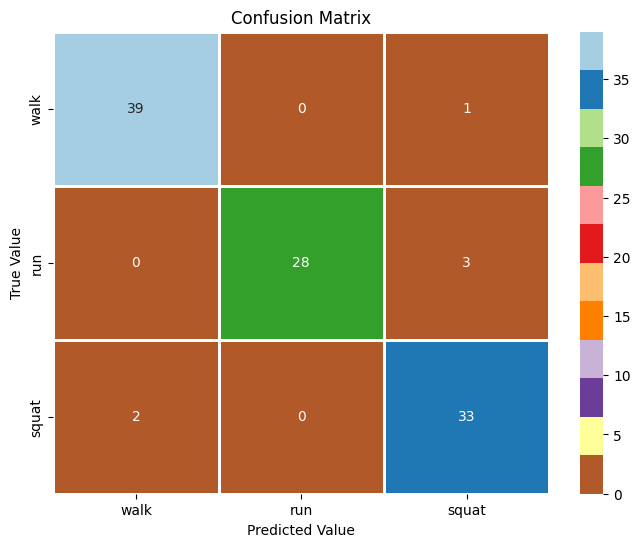

In [65]:
cm = confusion_matrix(y_val, y_pred_new_data)

activity_types = ['walk', 'run', 'squat']

# Візуалізація матриці плутанини з назвами типів активностей
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidths=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(activity_types)) + 0.5, labels=activity_types)
plt.yticks(ticks=np.arange(len(activity_types)) + 0.5, labels=activity_types)
plt.show()